In [1]:
from greedy_mcmc_attack import *
from data_collection.recordings import *
import sys
sys.path.append("../../")
from src.models.gcn import *
from src.models.gat import *
from src.models.gsage import *

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
# dataset_directory = "../Cora"
cora_dataset = Planetoid(root='', name='Citeseer')
data = cora_dataset[0].to(device)
print(data)

Data(x=[3327, 3703], edge_index=[2, 9104], y=[3327], train_mask=[3327], val_mask=[3327], test_mask=[3327])


In [4]:
edges_to_add = None

In [5]:
model = GraphSAGE(data.x.shape[1], cora_dataset.num_classes, [16]).to(device)

In [6]:
model_save_path = "../models/citeseer_gsage_model.pth"
list_save_path = "../attacks/citeseer_gsage_edges.pth"
# # multi_metattack_edges_list.pth
# list_save_path = "multi_metattack_edges_list.pth"

In [7]:
model, edges_to_add, train = load_model_and_edges(model_save_path, list_save_path, model, device)

In [8]:
# Get initial accuracy
initial_loss, initial_accuracy = train.test(data)
print(f"Initial Accuracy: {initial_accuracy}")
print(f"Initial Loss: {initial_loss}")

Initial Accuracy: 0.654
Initial Loss: 1.4953724145889282


In [9]:
G, initial_edge_count, ptb_rate, budget = initialize(data, _ptb_rate=0.15)

In [10]:
full_metattack_acc, full_metattack_loss, full_metattack_itrs = two_phase_attack_mcmc(data, train, model, 0.0, edges_to_add, binary_fn, constant_fn, device, is_reversed=False, verbose=True)

Peturbing graph...:   0%|          | 0/341 [00:00<?, ?it/s]

In [11]:
splits = [0.0, 0.5, 0.7, 0.9]
# splits = [0.9]
split_dic_acc = defaultdict(list)
split_dic_loss = defaultdict(list)
itrs_one = defaultdict(int)

In [12]:
for s in splits:
    if s == 0.0:
        split_dic_acc[s], split_dic_loss[s], itrs_one[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
    else:
        split_dic_acc[s], split_dic_loss[s], itrs_one[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, binary_fn, constant_fn, device, is_reversed=True, verbose=True)

Peturbing graph...:   0%|          | 0/170 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.014953724145889281, master_clean_delta: 1.8715858459472656e-05, master_dirty_delta: 1.8477439880371094e-05
Attempt: 19, Selected: 10
Attempt: 20, Selected: 10
max_change: 0.014953724145889281, master_clean_delta: 0.002793431282043457, master_dirty_delta: 0.0023936033248901367
Attempt: 21, Selected: 10
max_change: 0.014953724145889281, master_clean_delta: 0.0026895999908447266, master_dirty_delta: 0.002588629722595215
Attempt: 39, Selected: 20
max_change: 0.014953724145889281, master_clean_delta: 0.010091423988342285, master_dirty_delta: 0.007905125617980957
Attempt: 61, Selected: 30
max_change: 0.014953724145889281, master_clean_delta: 0.01475226879119873, master_dirty_delta: 0.012198567390441895
Attempt: 62, Selected: 30
max_change: 0.014953724145889281, master_clean_delta: 0.014954805374145508, master_dirty_delta: 0.012524843215942383
Attempt: 63, Selected: 30
max_change: 0.014953724145889281, master_clean_delta: 0.014634013175964355, master_dirt

Peturbing graph...:   0%|          | 0/102 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.014953724145889281, master_clean_delta: 1.8596649169921875e-05, master_dirty_delta: 1.8477439880371094e-05
Attempt: 15, Selected: 10
max_change: 0.014953724145889281, master_clean_delta: 0.0013074874877929688, master_dirty_delta: 0.001307368278503418
Attempt: 16, Selected: 10
max_change: 0.014953724145889281, master_clean_delta: 0.0013059377670288086, master_dirty_delta: 0.0013058185577392578
Attempt: 17, Selected: 10
max_change: 0.014953724145889281, master_clean_delta: 0.001307845115661621, master_dirty_delta: 0.0013077259063720703
Attempt: 38, Selected: 20
max_change: 0.014953724145889281, master_clean_delta: 0.008424162864685059, master_dirty_delta: 0.006459474563598633
Attempt: 57, Selected: 30
max_change: 0.014953724145889281, master_clean_delta: 0.01540076732635498, master_dirty_delta: 0.013066411018371582
Attempt: 58, Selected: 30
max_change: 0.014953724145889281, master_clean_delta: 0.013762831687927246, master_dirty_delta: 0.0115001201629

Peturbing graph...:   0%|          | 0/34 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.014953724145889281, master_clean_delta: 1.8596649169921875e-05, master_dirty_delta: 1.8596649169921875e-05
Attempt: 14, Selected: 10
max_change: 0.014953724145889281, master_clean_delta: 0.00414276123046875, master_dirty_delta: 0.004552006721496582
Attempt: 33, Selected: 20
max_change: 0.014953724145889281, master_clean_delta: 0.011899709701538086, master_dirty_delta: 0.010398149490356445
Attempt: 52, Selected: 30
max_change: 0.014953724145889281, master_clean_delta: 0.012835383415222168, master_dirty_delta: 0.011094927787780762
Attempt: 53, Selected: 30
max_change: 0.014953724145889281, master_clean_delta: 0.012902617454528809, master_dirty_delta: 0.011162161827087402
Attempt: 85, Selected: 40
max_change: 0.014953724145889281, master_clean_delta: 0.01495206356048584, master_dirty_delta: 0.013211727142333984
Attempt: 143, Selected: 50
max_change: 0.014953724145889281, master_clean_delta: 0.014937520027160645, master_dirty_delta: 0.01331758499145507

In [13]:
record1 = Recording(split_dic_loss, split_dic_acc, itrs_one, Model.GSAGE, Dataset.CITESEER, AcceptFn.CONSTANT, SelectFn.BINARY, Reverse.REVERSED)
record1.save(f'data_collection/{"mcmc"}_{"gsage"}_{"citeseer"}_{"constant"}_{"binary"}_{"reversed"}_results.pkl')

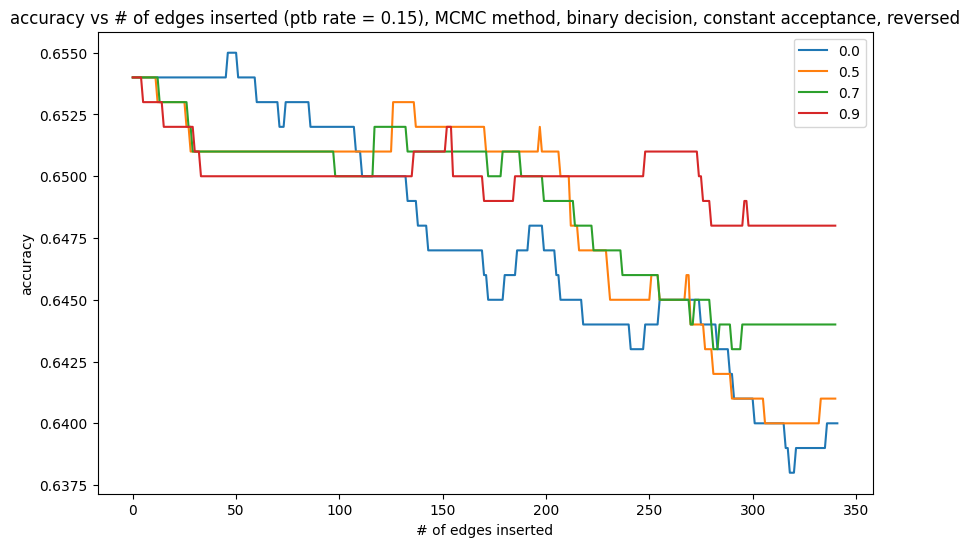

In [14]:
plot_results(split_dic_acc, ptb_rate, "MCMC", "binary", "constant", "accuracy", "reversed")

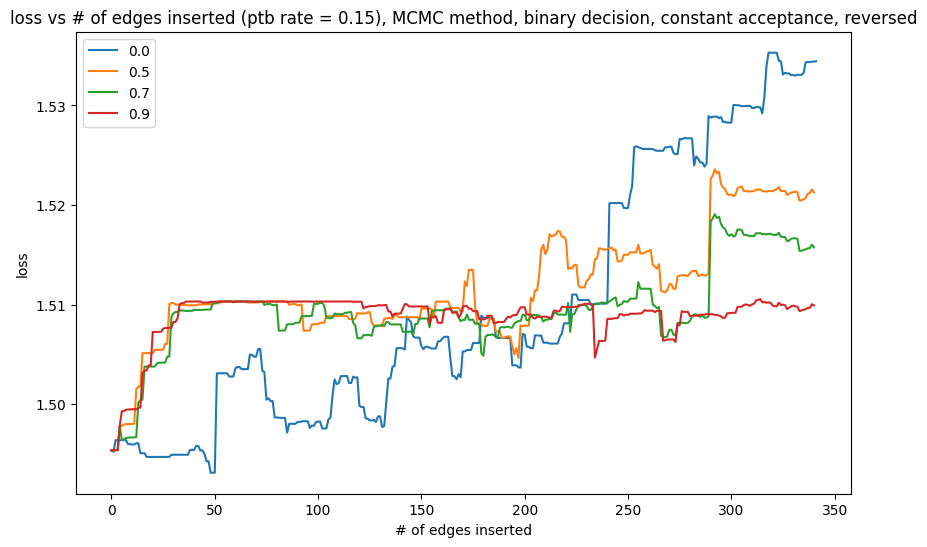

In [15]:
plot_results(split_dic_loss, ptb_rate, "MCMC", "binary", "constant", "loss", "reversed")

##### ideally, we could show some metric, where (change in loss after hidden for %) > (% * max change in loss)

In [16]:
split_dic_decreasing_acc = defaultdict(list)
itrs_two = defaultdict(int)
split_dic_decreasing_loss = defaultdict(list)

In [17]:
for s in splits:
    if s == 0.0:
        split_dic_decreasing_acc[s], split_dic_decreasing_loss[s], itrs_two[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
    else:
        split_dic_decreasing_acc[s], split_dic_decreasing_loss[s], itrs_two[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, binary_fn, increasing_fn, device, is_reversed=True, verbose=True)

Peturbing graph...:   0%|          | 0/170 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.014953724145889281, master_clean_delta: 1.8596649169921875e-05, master_dirty_delta: 1.8477439880371094e-05
Attempt: 22, Selected: 10
max_change: 0.014953724145889281, master_clean_delta: 0.003731846809387207, master_dirty_delta: 0.0034459829330444336
Attempt: 23, Selected: 10
max_change: 0.014953724145889281, master_clean_delta: -0.002434968948364258, master_dirty_delta: -0.002535700798034668
Attempt: 24, Selected: 10
max_change: 0.014953724145889281, master_clean_delta: 0.000518798828125, master_dirty_delta: 0.0002955198287963867
Attempt: 49, Selected: 20
max_change: 0.014953724145889281, master_clean_delta: 0.0006557703018188477, master_dirty_delta: 0.0006575584411621094
Attempt: 68, Selected: 30
max_change: 0.014953724145889281, master_clean_delta: 0.0029447078704833984, master_dirty_delta: 0.0022336244583129883
Attempt: 69, Selected: 30
max_change: 0.014953724145889281, master_clean_delta: 0.0012640953063964844, master_dirty_delta: 0.0016856193

Peturbing graph...:   0%|          | 0/102 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.014953724145889281, master_clean_delta: 1.8596649169921875e-05, master_dirty_delta: 1.8477439880371094e-05
Attempt: 21, Selected: 10
max_change: 0.014953724145889281, master_clean_delta: 0.003731846809387207, master_dirty_delta: 0.0035467147827148438
Attempt: 22, Selected: 10
max_change: 0.014953724145889281, master_clean_delta: -0.002434968948364258, master_dirty_delta: -0.002434849739074707
Attempt: 23, Selected: 10
max_change: 0.014953724145889281, master_clean_delta: 0.000518798828125, master_dirty_delta: 0.00039577484130859375
Attempt: 44, Selected: 20
max_change: 0.014953724145889281, master_clean_delta: 0.00024175643920898438, master_dirty_delta: 0.00023031234741210938
Attempt: 45, Selected: 20
max_change: 0.014953724145889281, master_clean_delta: 0.0007774829864501953, master_dirty_delta: 0.0007661581039428711
Attempt: 46, Selected: 20
max_change: 0.014953724145889281, master_clean_delta: 0.0009542703628540039, master_dirty_delta: 0.0009373

In [18]:
record1 = Recording(split_dic_decreasing_loss, split_dic_decreasing_acc, itrs_two, Model.GSAGE, Dataset.CITESEER, AcceptFn.INCREASING, SelectFn.BINARY, Reverse.REVERSED)
record1.save(f'data_collection/{"mcmc"}_{"gsage"}_{"citeseer"}_{"increasing"}_{"binary"}_{"reversed"}_results.pkl')

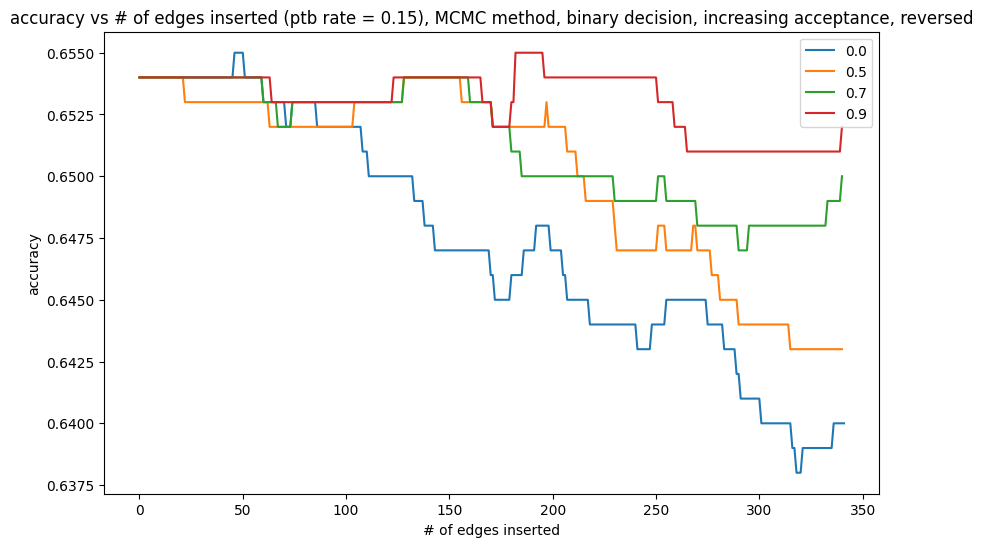

In [19]:
plot_results(split_dic_decreasing_acc, ptb_rate, "MCMC", "binary", "increasing", "accuracy", "reversed")

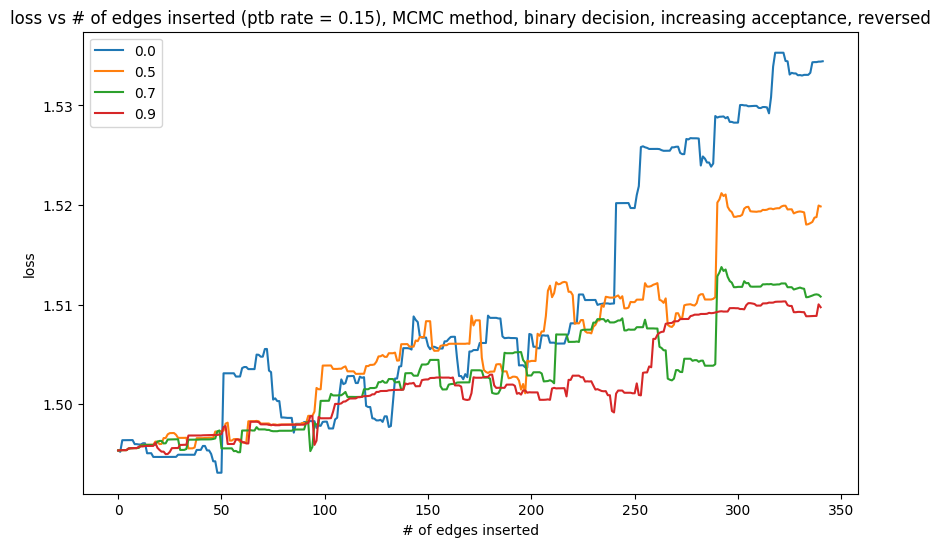

In [20]:
plot_results(split_dic_decreasing_loss, ptb_rate, "MCMC", "binary", "increasing", "loss", "reversed")

In [21]:
split_dic_decreasing_constant_acc = defaultdict(list)
split_dic_decreasing_constant_loss = defaultdict(list)
itrs_three = defaultdict(int)

In [22]:
for s in splits:
    if s == 0.0:
        split_dic_decreasing_constant_acc[s], split_dic_decreasing_constant_loss[s], itrs_three[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
    else:
        split_dic_decreasing_constant_acc[s], split_dic_decreasing_constant_loss[s], itrs_three[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, decreasing_fn, constant_fn, device, is_reversed=True, verbose=True)

Peturbing graph...:   0%|          | 0/170 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.014953724145889281, master_clean_delta: 1.8596649169921875e-05, master_dirty_delta: 1.8477439880371094e-05
Attempt: 19, Selected: 10
Attempt: 20, Selected: 10
max_change: 0.014953724145889281, master_clean_delta: 0.002793431282043457, master_dirty_delta: 0.0023937225341796875
Attempt: 21, Selected: 10
max_change: 0.014953724145889281, master_clean_delta: 0.0026895999908447266, master_dirty_delta: 0.002588629722595215
Attempt: 39, Selected: 20
max_change: 0.014953724145889281, master_clean_delta: 0.010091423988342285, master_dirty_delta: 0.007905125617980957
Attempt: 61, Selected: 30
max_change: 0.014953724145889281, master_clean_delta: 0.01475226879119873, master_dirty_delta: 0.012198567390441895
Attempt: 62, Selected: 30
max_change: 0.014953724145889281, master_clean_delta: 0.014954805374145508, master_dirty_delta: 0.012524843215942383
Attempt: 63, Selected: 30
max_change: 0.014953724145889281, master_clean_delta: 0.014634013175964355, master_dirt

Peturbing graph...:   0%|          | 0/102 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.014953724145889281, master_clean_delta: 1.8596649169921875e-05, master_dirty_delta: 1.8477439880371094e-05
Attempt: 14, Selected: 10
max_change: 0.014953724145889281, master_clean_delta: 0.00414276123046875, master_dirty_delta: 0.004523038864135742
Attempt: 35, Selected: 20
max_change: 0.014953724145889281, master_clean_delta: 0.0071915388107299805, master_dirty_delta: 0.00756680965423584
Attempt: 36, Selected: 20
max_change: 0.014953724145889281, master_clean_delta: 0.007995963096618652, master_dirty_delta: 0.008297443389892578
Attempt: 37, Selected: 20
max_change: 0.014953724145889281, master_clean_delta: 0.0077419281005859375, master_dirty_delta: 0.008078336715698242
Attempt: 38, Selected: 20
max_change: 0.014953724145889281, master_clean_delta: 0.008012652397155762, master_dirty_delta: 0.008319735527038574
Attempt: 61, Selected: 30
max_change: 0.014953724145889281, master_clean_delta: 0.014169096946716309, master_dirty_delta: 0.0144373178482055

Peturbing graph...:   0%|          | 0/34 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.014953724145889281, master_clean_delta: 1.8596649169921875e-05, master_dirty_delta: 1.8596649169921875e-05
Attempt: 14, Selected: 10
max_change: 0.014953724145889281, master_clean_delta: 0.00414276123046875, master_dirty_delta: 0.004552006721496582
Attempt: 33, Selected: 20
max_change: 0.014953724145889281, master_clean_delta: 0.011899709701538086, master_dirty_delta: 0.010398149490356445
Attempt: 52, Selected: 30
max_change: 0.014953724145889281, master_clean_delta: 0.012835383415222168, master_dirty_delta: 0.011094927787780762
Attempt: 53, Selected: 30
max_change: 0.014953724145889281, master_clean_delta: 0.012902617454528809, master_dirty_delta: 0.011162161827087402
Attempt: 85, Selected: 40
max_change: 0.014953724145889281, master_clean_delta: 0.01495206356048584, master_dirty_delta: 0.013211727142333984
Attempt: 143, Selected: 50
max_change: 0.014953724145889281, master_clean_delta: 0.014937520027160645, master_dirty_delta: 0.01331758499145507

In [23]:
record1 = Recording(split_dic_decreasing_constant_loss, split_dic_decreasing_constant_acc, itrs_three, Model.GSAGE, Dataset.CITESEER, AcceptFn.CONSTANT, SelectFn.DECAYING, Reverse.REVERSED)
record1.save(f'data_collection/{"mcmc"}_{"gsage"}_{"citeseer"}_{"constant"}_{"decaying"}_{"reversed"}_results.pkl')

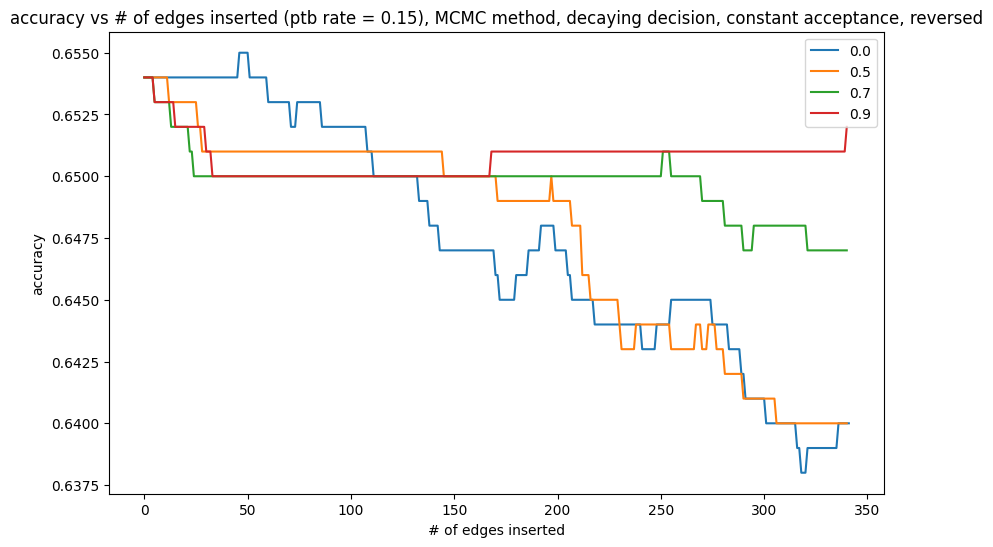

In [24]:
plot_results(split_dic_decreasing_constant_acc, ptb_rate, "MCMC", "decaying", "constant", "accuracy", "reversed")

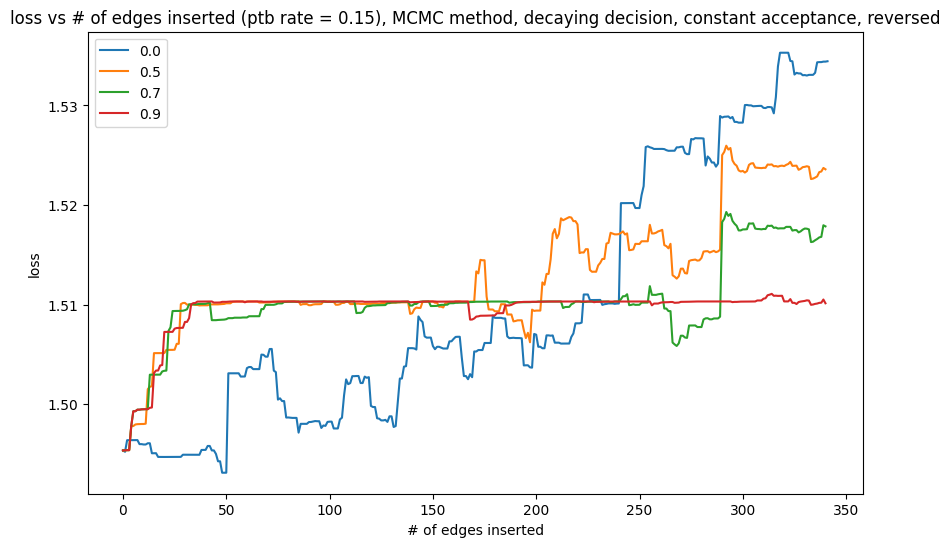

In [25]:
plot_results(split_dic_decreasing_constant_loss, ptb_rate, "MCMC", "decaying", "constant", "loss", "reversed")

In [26]:
split_dic_decreasing_gradual_acc = defaultdict(list)
split_dic_decreasing_gradual_loss = defaultdict(list)
itrs_four = defaultdict(int)

In [27]:
for s in splits:
    if s == 0.0:
        split_dic_decreasing_gradual_acc[s], split_dic_decreasing_gradual_loss[s], itrs_four[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
    else:
        split_dic_decreasing_gradual_acc[s], split_dic_decreasing_gradual_loss[s], itrs_four[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, decreasing_fn, increasing_fn, device, is_reversed=True, verbose=True)

Peturbing graph...:   0%|          | 0/170 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.014953724145889281, master_clean_delta: 1.8596649169921875e-05, master_dirty_delta: 1.8477439880371094e-05
Attempt: 22, Selected: 10
max_change: 0.014953724145889281, master_clean_delta: 0.003731846809387207, master_dirty_delta: 0.0034459829330444336
Attempt: 23, Selected: 10
max_change: 0.014953724145889281, master_clean_delta: -0.002434968948364258, master_dirty_delta: -0.002535700798034668
Attempt: 24, Selected: 10
max_change: 0.014953724145889281, master_clean_delta: 0.000518798828125, master_dirty_delta: 0.0002955198287963867
Attempt: 50, Selected: 20
max_change: 0.014953724145889281, master_clean_delta: 0.00016021728515625, master_dirty_delta: 0.0001493692398071289
Attempt: 51, Selected: 20
max_change: 0.014953724145889281, master_clean_delta: 0.0014972686767578125, master_dirty_delta: 0.0010393857955932617
Attempt: 71, Selected: 30
max_change: 0.014953724145889281, master_clean_delta: 0.004712343215942383, master_dirty_delta: 0.0048624277114

Peturbing graph...:   0%|          | 0/102 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.014953724145889281, master_clean_delta: 1.8596649169921875e-05, master_dirty_delta: 1.8477439880371094e-05
Attempt: 21, Selected: 10
max_change: 0.014953724145889281, master_clean_delta: 0.0037317276000976562, master_dirty_delta: 0.0035467147827148438
Attempt: 22, Selected: 10
max_change: 0.014953724145889281, master_clean_delta: -0.002434968948364258, master_dirty_delta: -0.002434849739074707
Attempt: 23, Selected: 10
max_change: 0.014953724145889281, master_clean_delta: 0.000518798828125, master_dirty_delta: 0.00039577484130859375
Attempt: 44, Selected: 20
max_change: 0.014953724145889281, master_clean_delta: 0.00024175643920898438, master_dirty_delta: 0.00023031234741210938
Attempt: 45, Selected: 20
max_change: 0.014953724145889281, master_clean_delta: 0.0007774829864501953, master_dirty_delta: 0.0007661581039428711
Attempt: 46, Selected: 20
max_change: 0.014953724145889281, master_clean_delta: 0.0009542703628540039, master_dirty_delta: 0.000937

Peturbing graph...:   0%|          | 0/34 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.014953724145889281, master_clean_delta: 1.8596649169921875e-05, master_dirty_delta: 1.8596649169921875e-05
Attempt: 20, Selected: 10
max_change: 0.014953724145889281, master_clean_delta: 0.00040721893310546875, master_dirty_delta: 0.00040721893310546875
Attempt: 51, Selected: 20
max_change: 0.014953724145889281, master_clean_delta: 0.0007537603378295898, master_dirty_delta: 0.0007539987564086914
Attempt: 52, Selected: 20
max_change: 0.014953724145889281, master_clean_delta: 0.0006356239318847656, master_dirty_delta: 0.0006356239318847656
Attempt: 53, Selected: 20
max_change: 0.014953724145889281, master_clean_delta: 0.0008102655410766602, master_dirty_delta: 0.0008102655410766602
Attempt: 84, Selected: 30
max_change: 0.014953724145889281, master_clean_delta: 0.0008449554443359375, master_dirty_delta: 0.0008585453033447266
Attempt: 85, Selected: 30
max_change: 0.014953724145889281, master_clean_delta: 0.0008491277694702148, master_dirty_delta: 0.000

In [28]:
record1 = Recording(split_dic_decreasing_gradual_loss, split_dic_decreasing_gradual_acc, itrs_four, Model.GSAGE, Dataset.CITESEER, AcceptFn.CONSTANT, SelectFn.DECAYING, Reverse.REVERSED)
record1.save(f'data_collection/{"mcmc"}_{"gsage"}_{"citeseer"}_{"increasing"}_{"decaying"}_{"reversed"}_results.pkl')

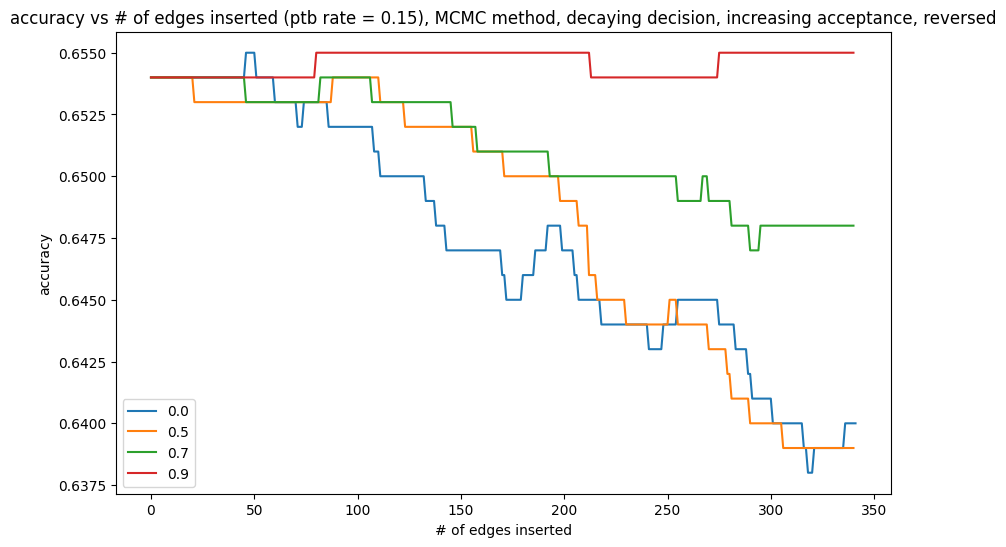

In [29]:
plot_results(split_dic_decreasing_gradual_acc, ptb_rate, "MCMC", "decaying", "increasing", "accuracy", "reversed")

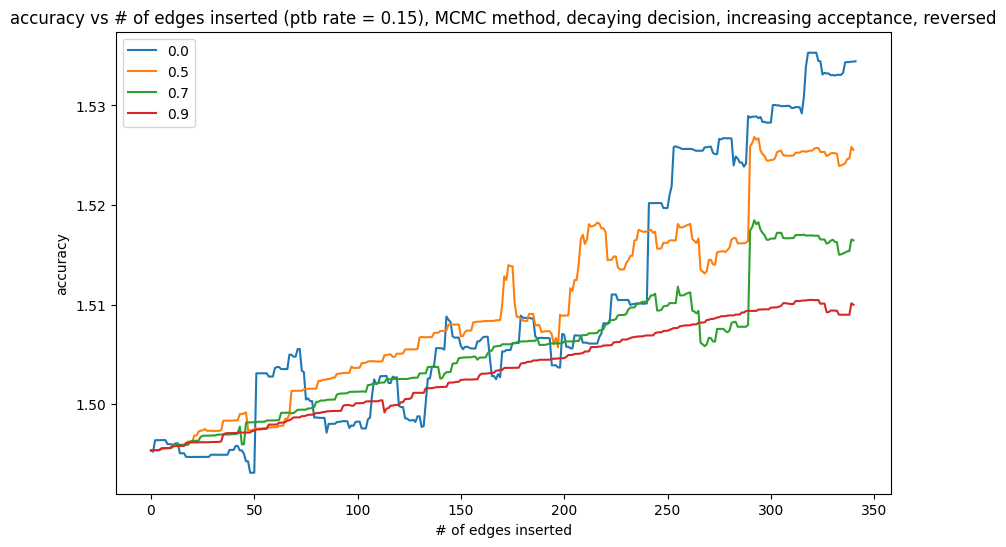

In [30]:
plot_results(split_dic_decreasing_gradual_loss, ptb_rate, "MCMC", "decaying", "increasing", "accuracy", "reversed")

# regular, secondary attack, not reversed

In [31]:
splits = [0.0, 0.5, 0.7, 0.9]
# splits = [0.9]
split_dic_acc = defaultdict(list)
split_dic_loss = defaultdict(list)
itrs_one = defaultdict(int)

In [32]:
for s in splits:
    if s == 0.0:
        split_dic_acc[s], split_dic_loss[s], itrs_one[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
    else:
        split_dic_acc[s], split_dic_loss[s], itrs_one[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, binary_fn, constant_fn, device, is_reversed=False, verbose=True)

Peturbing graph...:   0%|          | 0/170 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.014953724145889281, master_clean_delta: 1.8715858459472656e-05, master_dirty_delta: 1.8477439880371094e-05
Attempt: 19, Selected: 10
Attempt: 20, Selected: 10
max_change: 0.014953724145889281, master_clean_delta: 0.002793431282043457, master_dirty_delta: 0.0023936033248901367
Attempt: 21, Selected: 10
max_change: 0.014953724145889281, master_clean_delta: 0.0026895999908447266, master_dirty_delta: 0.002588629722595215
Attempt: 39, Selected: 20
max_change: 0.014953724145889281, master_clean_delta: 0.010091423988342285, master_dirty_delta: 0.007905125617980957
Attempt: 61, Selected: 30
max_change: 0.014953724145889281, master_clean_delta: 0.01475226879119873, master_dirty_delta: 0.012198567390441895
Attempt: 62, Selected: 30
max_change: 0.014953724145889281, master_clean_delta: 0.014954805374145508, master_dirty_delta: 0.012524843215942383
Attempt: 63, Selected: 30
max_change: 0.014953724145889281, master_clean_delta: 0.014634013175964355, master_dirt

Peturbing graph...:   0%|          | 0/176 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/102 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.014953724145889281, master_clean_delta: 1.8596649169921875e-05, master_dirty_delta: 1.8477439880371094e-05
Attempt: 15, Selected: 10
max_change: 0.014953724145889281, master_clean_delta: 0.0013074874877929688, master_dirty_delta: 0.001307368278503418
Attempt: 16, Selected: 10
max_change: 0.014953724145889281, master_clean_delta: 0.0013059377670288086, master_dirty_delta: 0.0013058185577392578
Attempt: 17, Selected: 10
max_change: 0.014953724145889281, master_clean_delta: 0.001307845115661621, master_dirty_delta: 0.0013077259063720703
Attempt: 38, Selected: 20
max_change: 0.014953724145889281, master_clean_delta: 0.008424162864685059, master_dirty_delta: 0.006459474563598633
Attempt: 57, Selected: 30
max_change: 0.014953724145889281, master_clean_delta: 0.01540076732635498, master_dirty_delta: 0.013066411018371582
Attempt: 58, Selected: 30
max_change: 0.014953724145889281, master_clean_delta: 0.013762831687927246, master_dirty_delta: 0.0115001201629

Peturbing graph...:   0%|          | 0/107 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/34 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.014953724145889281, master_clean_delta: 1.8715858459472656e-05, master_dirty_delta: 1.8596649169921875e-05
Attempt: 14, Selected: 10
max_change: 0.014953724145889281, master_clean_delta: 0.00414276123046875, master_dirty_delta: 0.004552006721496582
Attempt: 33, Selected: 20
max_change: 0.014953724145889281, master_clean_delta: 0.011899709701538086, master_dirty_delta: 0.010398149490356445
Attempt: 52, Selected: 30
max_change: 0.014953724145889281, master_clean_delta: 0.012835383415222168, master_dirty_delta: 0.011094927787780762
Attempt: 53, Selected: 30
max_change: 0.014953724145889281, master_clean_delta: 0.012902617454528809, master_dirty_delta: 0.011162161827087402
Attempt: 85, Selected: 40
max_change: 0.014953724145889281, master_clean_delta: 0.01495206356048584, master_dirty_delta: 0.013211607933044434
Attempt: 129, Selected: 50
max_change: 0.014953724145889281, master_clean_delta: 0.013262510299682617, master_dirty_delta: 0.01164221763610839

Peturbing graph...:   0%|          | 0/36 [00:00<?, ?it/s]

In [33]:
record1 = Recording(split_dic_loss, split_dic_acc, itrs_one, Model.GSAGE, Dataset.CITESEER, AcceptFn.CONSTANT, SelectFn.BINARY, Reverse.ATTACKED)
record1.save(f'data_collection/{"mcmc"}_{"gsage"}_{"citeseer"}_{"constant"}_{"binary"}_{"attacked"}_results.pkl')

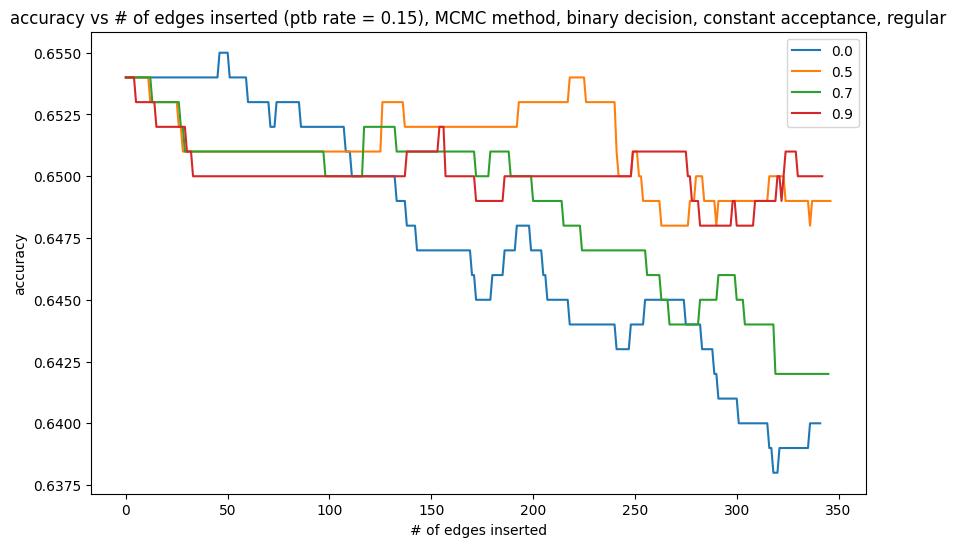

In [34]:
plot_results(split_dic_acc, ptb_rate, "MCMC", "binary", "constant", "accuracy", "regular")

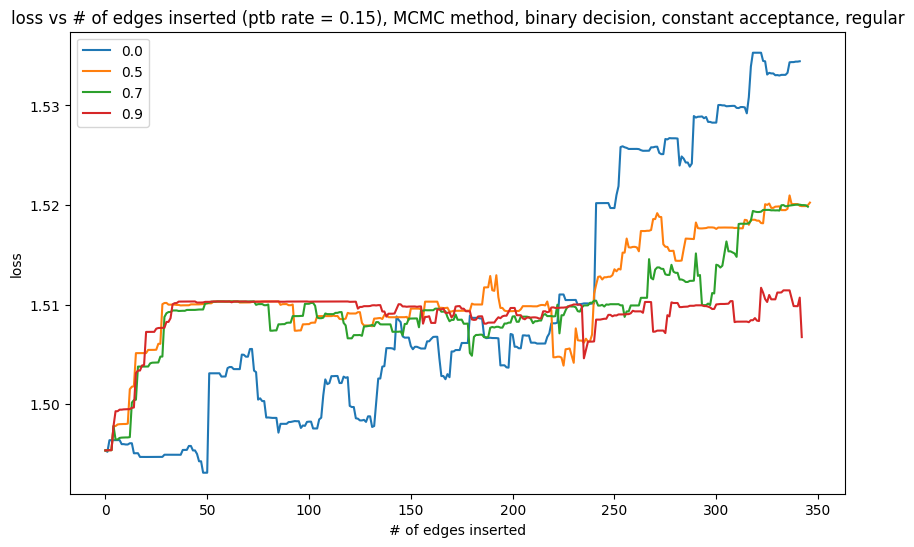

In [35]:
plot_results(split_dic_loss, ptb_rate, "MCMC", "binary", "constant", "loss", "regular")

##### ideally, we could show some metric, where (change in loss after hidden for %) > (% * max change in loss)

In [36]:
split_dic_decreasing_acc = defaultdict(list)
itrs_two = defaultdict(int)
split_dic_decreasing_loss = defaultdict(list)

In [37]:
for s in splits:
    if s == 0.0:
        split_dic_decreasing_acc[s], split_dic_decreasing_loss[s], itrs_two[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
    else:
        split_dic_decreasing_acc[s], split_dic_decreasing_loss[s], itrs_two[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, binary_fn, increasing_fn, device, is_reversed=False, verbose=True)

Peturbing graph...:   0%|          | 0/170 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.014953724145889281, master_clean_delta: 1.8715858459472656e-05, master_dirty_delta: 1.8477439880371094e-05
Attempt: 22, Selected: 10
max_change: 0.014953724145889281, master_clean_delta: 0.003731846809387207, master_dirty_delta: 0.0034459829330444336
Attempt: 23, Selected: 10
max_change: 0.014953724145889281, master_clean_delta: -0.002434968948364258, master_dirty_delta: -0.002535700798034668
Attempt: 24, Selected: 10
max_change: 0.014953724145889281, master_clean_delta: 0.000518798828125, master_dirty_delta: 0.0002955198287963867
Attempt: 49, Selected: 20
max_change: 0.014953724145889281, master_clean_delta: 0.0006557703018188477, master_dirty_delta: 0.0006575584411621094
Attempt: 68, Selected: 30
max_change: 0.014953724145889281, master_clean_delta: 0.0029447078704833984, master_dirty_delta: 0.0022336244583129883
Attempt: 69, Selected: 30
max_change: 0.014953724145889281, master_clean_delta: 0.0012640953063964844, master_dirty_delta: 0.0016856193

Peturbing graph...:   0%|          | 0/176 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/102 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.014953724145889281, master_clean_delta: 1.8596649169921875e-05, master_dirty_delta: 1.8477439880371094e-05
Attempt: 21, Selected: 10
max_change: 0.014953724145889281, master_clean_delta: 0.0037317276000976562, master_dirty_delta: 0.0035467147827148438
Attempt: 22, Selected: 10
max_change: 0.014953724145889281, master_clean_delta: -0.002434968948364258, master_dirty_delta: -0.002434849739074707
Attempt: 23, Selected: 10
max_change: 0.014953724145889281, master_clean_delta: 0.000518798828125, master_dirty_delta: 0.00039577484130859375
Attempt: 44, Selected: 20
max_change: 0.014953724145889281, master_clean_delta: 0.00024175643920898438, master_dirty_delta: 0.00023031234741210938
Attempt: 45, Selected: 20
max_change: 0.014953724145889281, master_clean_delta: 0.0007777214050292969, master_dirty_delta: 0.0007661581039428711
Attempt: 46, Selected: 20
max_change: 0.014953724145889281, master_clean_delta: 0.0009542703628540039, master_dirty_delta: 0.000937

Peturbing graph...:   0%|          | 0/107 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/34 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.014953724145889281, master_clean_delta: 1.8596649169921875e-05, master_dirty_delta: 1.8596649169921875e-05
Attempt: 20, Selected: 10
max_change: 0.014953724145889281, master_clean_delta: 0.00040721893310546875, master_dirty_delta: 0.00040721893310546875
Attempt: 39, Selected: 20
max_change: 0.014953724145889281, master_clean_delta: -0.000657200813293457, master_dirty_delta: -0.00027692317962646484
Attempt: 40, Selected: 20
max_change: 0.014953724145889281, master_clean_delta: -0.00012135505676269531, master_dirty_delta: 0.0002586841583251953
Attempt: 63, Selected: 30
max_change: 0.014953724145889281, master_clean_delta: 0.0005574226379394531, master_dirty_delta: 0.0009149312973022461
Attempt: 76, Selected: 40
max_change: 0.014953724145889281, master_clean_delta: 0.0015015602111816406, master_dirty_delta: 0.001871943473815918
Attempt: 77, Selected: 40
max_change: 0.014953724145889281, master_clean_delta: 0.0014319419860839844, master_dirty_delta: 0.

Peturbing graph...:   0%|          | 0/36 [00:00<?, ?it/s]

In [38]:
record1 = Recording(split_dic_decreasing_loss, split_dic_decreasing_acc, itrs_two, Model.GSAGE, Dataset.CITESEER, AcceptFn.INCREASING, SelectFn.BINARY, Reverse.ATTACKED)
record1.save(f'data_collection/{"mcmc"}_{"gsage"}_{"citeseer"}_{"increasing"}_{"binary"}_{"attacked"}_results.pkl')

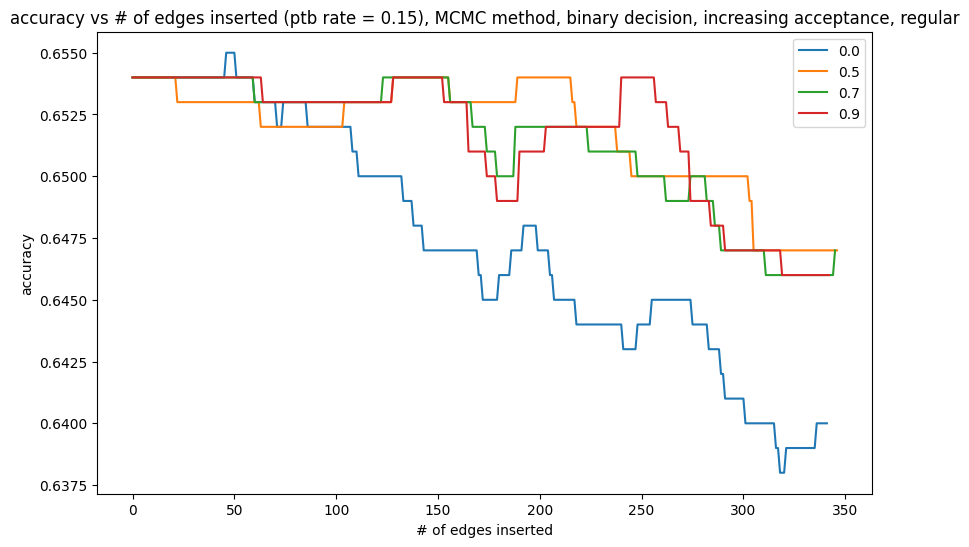

In [39]:
plot_results(split_dic_decreasing_acc, ptb_rate, "MCMC", "binary", "increasing", "accuracy", "regular")

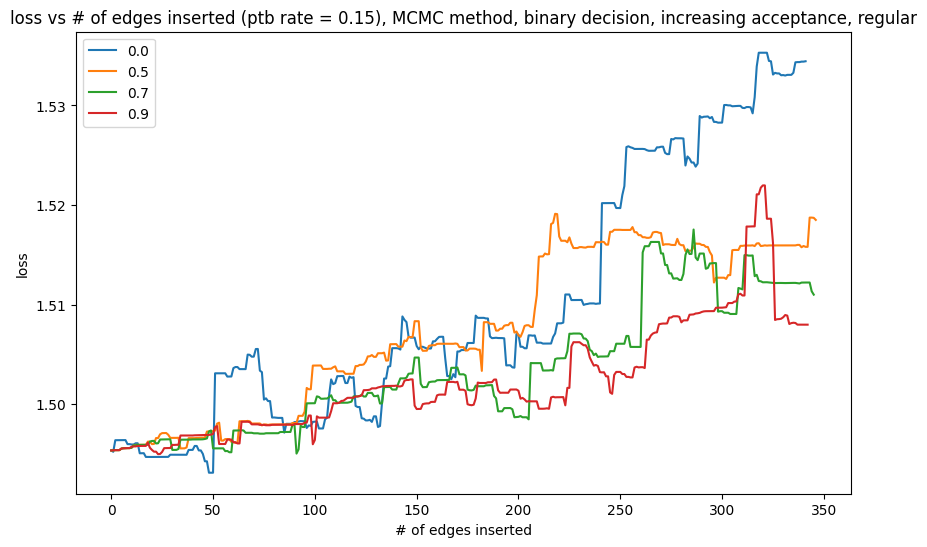

In [40]:
plot_results(split_dic_decreasing_loss, ptb_rate, "MCMC", "binary", "increasing", "loss", "regular")

In [41]:
split_dic_decreasing_constant_acc = defaultdict(list)
split_dic_decreasing_constant_loss = defaultdict(list)
itrs_three = defaultdict(int)

In [42]:
for s in splits:
    if s == 0.0:
        split_dic_decreasing_constant_acc[s], split_dic_decreasing_constant_loss[s], itrs_three[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
    else:
        split_dic_decreasing_constant_acc[s], split_dic_decreasing_constant_loss[s], itrs_three[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, decreasing_fn, constant_fn, device, is_reversed=False, verbose=True)

Peturbing graph...:   0%|          | 0/170 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.014953724145889281, master_clean_delta: 1.8596649169921875e-05, master_dirty_delta: 1.8477439880371094e-05
Attempt: 19, Selected: 10
Attempt: 20, Selected: 10
max_change: 0.014953724145889281, master_clean_delta: 0.002793431282043457, master_dirty_delta: 0.0023937225341796875
Attempt: 21, Selected: 10
max_change: 0.014953724145889281, master_clean_delta: 0.0026895999908447266, master_dirty_delta: 0.002588629722595215
Attempt: 39, Selected: 20
max_change: 0.014953724145889281, master_clean_delta: 0.010091423988342285, master_dirty_delta: 0.007905244827270508
Attempt: 64, Selected: 30
max_change: 0.014953724145889281, master_clean_delta: 0.014319539070129395, master_dirty_delta: 0.012143611907958984
Attempt: 65, Selected: 30
max_change: 0.014953724145889281, master_clean_delta: 0.01463472843170166, master_dirty_delta: 0.012328386306762695
Attempt: 83, Selected: 40
max_change: 0.014953724145889281, master_clean_delta: 0.014659285545349121, master_dirt

Peturbing graph...:   0%|          | 0/176 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/102 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.014953724145889281, master_clean_delta: 1.8596649169921875e-05, master_dirty_delta: 1.8477439880371094e-05
Attempt: 14, Selected: 10
max_change: 0.014953724145889281, master_clean_delta: 0.00414276123046875, master_dirty_delta: 0.004523038864135742
Attempt: 61, Selected: 30
max_change: 0.014953724145889281, master_clean_delta: 0.014169096946716309, master_dirty_delta: 0.014437317848205566
Attempt: 83, Selected: 40
max_change: 0.014953724145889281, master_clean_delta: 0.014748454093933105, master_dirty_delta: 0.014992356300354004
Attempt: 84, Selected: 40
max_change: 0.014953724145889281, master_clean_delta: 0.014716625213623047, master_dirty_delta: 0.01504528522491455
Attempt: 85, Selected: 40
max_change: 0.014953724145889281, master_clean_delta: 0.014673829078674316, master_dirty_delta: 0.015002608299255371
Attempt: 86, Selected: 40
max_change: 0.014953724145889281, master_clean_delta: 0.014776468276977539, master_dirty_delta: 0.015105247497558594

Peturbing graph...:   0%|          | 0/107 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/34 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.014953724145889281, master_clean_delta: 1.8596649169921875e-05, master_dirty_delta: 1.8596649169921875e-05
Attempt: 14, Selected: 10
max_change: 0.014953724145889281, master_clean_delta: 0.00414276123046875, master_dirty_delta: 0.004552006721496582
Attempt: 33, Selected: 20
max_change: 0.014953724145889281, master_clean_delta: 0.011899709701538086, master_dirty_delta: 0.010398149490356445
Attempt: 52, Selected: 30
max_change: 0.014953724145889281, master_clean_delta: 0.012835383415222168, master_dirty_delta: 0.011094927787780762
Attempt: 53, Selected: 30
max_change: 0.014953724145889281, master_clean_delta: 0.012902617454528809, master_dirty_delta: 0.011162161827087402
Attempt: 85, Selected: 40
max_change: 0.014953724145889281, master_clean_delta: 0.01495206356048584, master_dirty_delta: 0.013211607933044434
Attempt: 129, Selected: 50
max_change: 0.014953724145889281, master_clean_delta: 0.013262510299682617, master_dirty_delta: 0.01164221763610839

Peturbing graph...:   0%|          | 0/36 [00:00<?, ?it/s]

In [43]:
record1 = Recording(split_dic_decreasing_constant_loss, split_dic_decreasing_constant_acc, itrs_three, Model.GSAGE, Dataset.CITESEER, AcceptFn.CONSTANT, SelectFn.DECAYING, Reverse.ATTACKED)
record1.save(f'data_collection/{"mcmc"}_{"gsage"}_{"citeseer"}_{"constant"}_{"decaying"}_{"attacked"}_results.pkl')

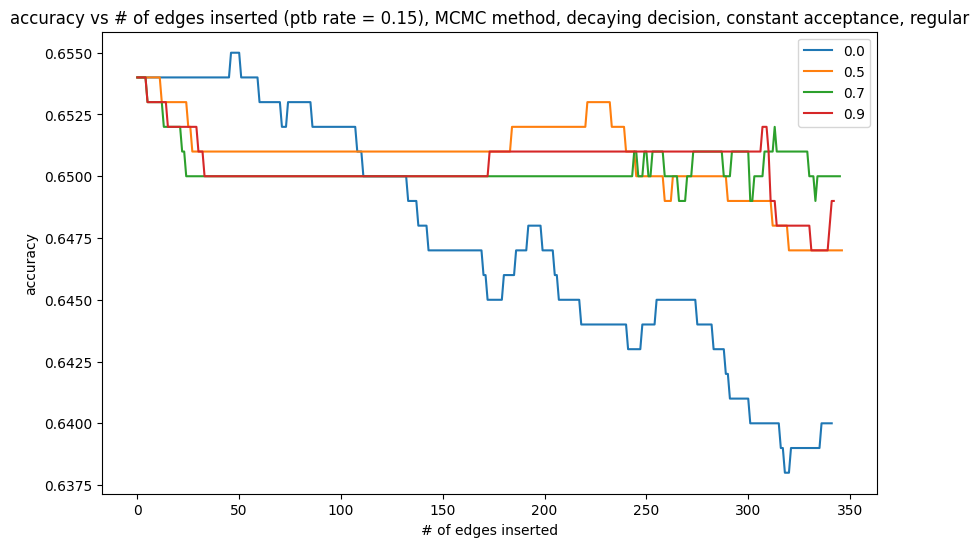

In [44]:
plot_results(split_dic_decreasing_constant_acc, ptb_rate, "MCMC", "decaying", "constant", "accuracy", "regular")

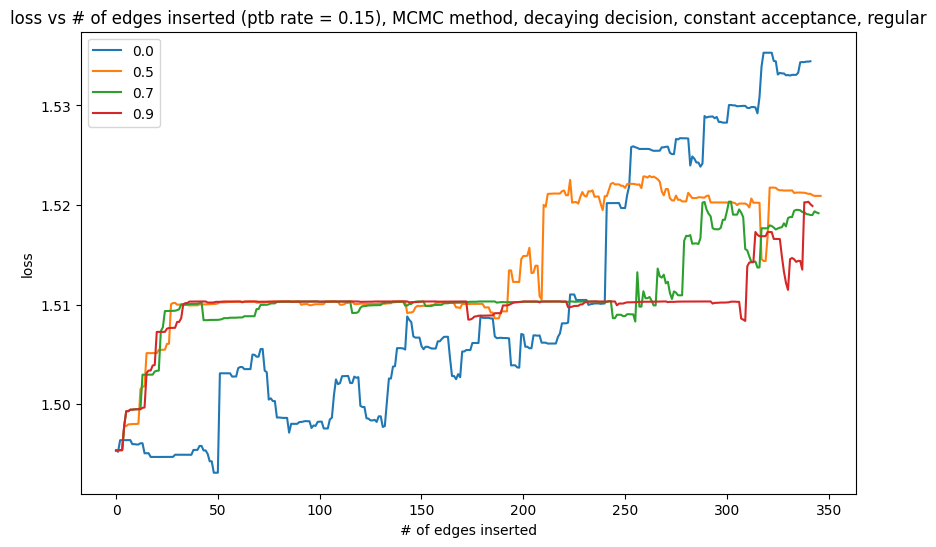

In [45]:
plot_results(split_dic_decreasing_constant_loss, ptb_rate, "MCMC", "decaying", "constant", "loss", "regular")

In [46]:
split_dic_decreasing_gradual_acc = defaultdict(list)
split_dic_decreasing_gradual_loss = defaultdict(list)
itrs_four = defaultdict(int)

In [47]:
for s in splits:
    if s == 0.0:
        split_dic_decreasing_gradual_acc[s], split_dic_decreasing_gradual_loss[s], itrs_four[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
    else:
        split_dic_decreasing_gradual_acc[s], split_dic_decreasing_gradual_loss[s], itrs_four[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, decreasing_fn, increasing_fn, device, is_reversed=False, verbose=True)

Peturbing graph...:   0%|          | 0/170 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.014953724145889281, master_clean_delta: 1.8715858459472656e-05, master_dirty_delta: 1.8477439880371094e-05
Attempt: 22, Selected: 10
max_change: 0.014953724145889281, master_clean_delta: 0.003731846809387207, master_dirty_delta: 0.0034459829330444336
Attempt: 23, Selected: 10
max_change: 0.014953724145889281, master_clean_delta: -0.002434968948364258, master_dirty_delta: -0.002535700798034668
Attempt: 24, Selected: 10
max_change: 0.014953724145889281, master_clean_delta: 0.000518798828125, master_dirty_delta: 0.0002955198287963867
Attempt: 50, Selected: 20
max_change: 0.014953724145889281, master_clean_delta: 0.00016021728515625, master_dirty_delta: 0.0001493692398071289
Attempt: 51, Selected: 20
max_change: 0.014953724145889281, master_clean_delta: 0.0014972686767578125, master_dirty_delta: 0.0010393857955932617
Attempt: 71, Selected: 30
max_change: 0.014953724145889281, master_clean_delta: 0.004712343215942383, master_dirty_delta: 0.0048624277114

Peturbing graph...:   0%|          | 0/177 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/102 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.014953724145889281, master_clean_delta: 1.8596649169921875e-05, master_dirty_delta: 1.8477439880371094e-05
Attempt: 21, Selected: 10
max_change: 0.014953724145889281, master_clean_delta: 0.0037317276000976562, master_dirty_delta: 0.0035467147827148438
Attempt: 22, Selected: 10
max_change: 0.014953724145889281, master_clean_delta: -0.002434968948364258, master_dirty_delta: -0.002434849739074707
Attempt: 23, Selected: 10
max_change: 0.014953724145889281, master_clean_delta: 0.000518798828125, master_dirty_delta: 0.00039577484130859375
Attempt: 44, Selected: 20
max_change: 0.014953724145889281, master_clean_delta: 0.00024175643920898438, master_dirty_delta: 0.00023031234741210938
Attempt: 45, Selected: 20
max_change: 0.014953724145889281, master_clean_delta: 0.0007777214050292969, master_dirty_delta: 0.0007661581039428711
Attempt: 46, Selected: 20
max_change: 0.014953724145889281, master_clean_delta: 0.0009542703628540039, master_dirty_delta: 0.000937

Peturbing graph...:   0%|          | 0/107 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/34 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.014953724145889281, master_clean_delta: 1.8596649169921875e-05, master_dirty_delta: 1.8596649169921875e-05
Attempt: 20, Selected: 10
max_change: 0.014953724145889281, master_clean_delta: 0.00040721893310546875, master_dirty_delta: 0.00040721893310546875
Attempt: 51, Selected: 20
max_change: 0.014953724145889281, master_clean_delta: 0.0007537603378295898, master_dirty_delta: 0.0007539987564086914
Attempt: 52, Selected: 20
max_change: 0.014953724145889281, master_clean_delta: 0.0006356239318847656, master_dirty_delta: 0.0006356239318847656
Attempt: 53, Selected: 20
max_change: 0.014953724145889281, master_clean_delta: 0.0008102655410766602, master_dirty_delta: 0.0008102655410766602
Attempt: 84, Selected: 30
max_change: 0.014953724145889281, master_clean_delta: 0.0008449554443359375, master_dirty_delta: 0.0008585453033447266
Attempt: 85, Selected: 30
max_change: 0.014953724145889281, master_clean_delta: 0.0008491277694702148, master_dirty_delta: 0.000

Peturbing graph...:   0%|          | 0/36 [00:00<?, ?it/s]

In [48]:
record1 = Recording(split_dic_decreasing_gradual_loss, split_dic_decreasing_gradual_acc, itrs_four, Model.GSAGE, Dataset.CITESEER, AcceptFn.CONSTANT, SelectFn.DECAYING, Reverse.ATTACKED)
record1.save(f'data_collection/{"mcmc"}_{"gsage"}_{"citeseer"}_{"increasing"}_{"decaying"}_{"attacked"}_results.pkl')

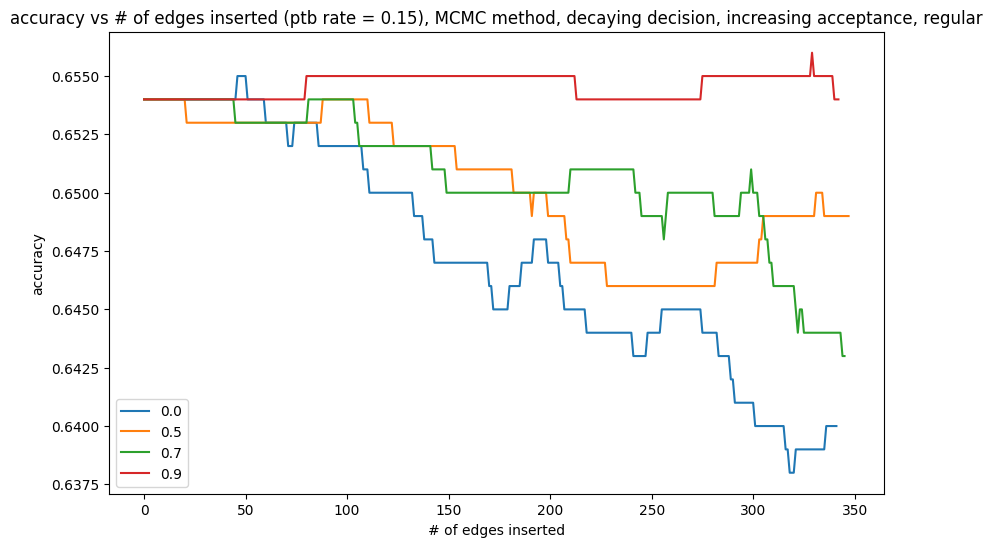

In [49]:
plot_results(split_dic_decreasing_gradual_acc, ptb_rate, "MCMC", "decaying", "increasing", "accuracy", "regular")

In [ ]:
plot_results(split_dic_decreasing_gradual_loss, ptb_rate, "MCMC", "decaying", "increasing", "accuracy", "regular")